<a href="https://colab.research.google.com/github/vijayvaradh/Telco_churn-prediction/blob/main/Churn_prediction_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
url = 'https://github.com/vijayvaradh/Telco_churn-prediction'
df_train = pd.read_csv('https://raw.githubusercontent.com/vijayvaradh/Telco_churn-prediction/main/cell2celltrain.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/vijayvaradh/Telco_churn-prediction/main/cell2cellholdout.csv')

In [15]:
df_train.shape

(51047, 58)

In [18]:
df_test.shape

(20000, 58)

In [19]:
20000/(51047+20000)

0.28150379326361424

In [22]:
df_train.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,...,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,...,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,...,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,...,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,...,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


In [21]:
df_train.dtypes

CustomerID                     int64
Churn                         object
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
ServiceArea                   object
H

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PaperlessBilling     0
PaymentMethod        0
Contract             0
MonthlyCharges       0
churn                0
Tenure               0
DeviceProtection     0
InternetService      0
MultipleLines        0
OnlineBackup         0
OnlineSecurity       0
PhoneService         0
StreamingMovies      0
StreamingTV          0
TechSupport          0
MeanMonthlyCharge    0
MeanMonthlyUsage     0
dtype: int64

In [ ]:
df.dtypes

customerID            object
gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
PaperlessBilling      object
PaymentMethod         object
Contract              object
MonthlyCharges       float64
churn                  int64
Tenure               float64
DeviceProtection      object
InternetService       object
MultipleLines         object
OnlineBackup          object
OnlineSecurity        object
PhoneService          object
StreamingMovies       object
StreamingTV           object
TechSupport           object
MeanMonthlyCharge      int64
MeanMonthlyUsage      object
dtype: object

In [ ]:
df['MeanMonthlyUsage'] = pd.to_numeric(df['MeanMonthlyUsage'], errors ='coerce')
df['MeanMonthlyCharge'] = pd.to_numeric(df['MeanMonthlyCharge'], errors ='coerce')

In [ ]:
import matplotlib.pyplot as plt
pd.crosstab(df.churn,df.gender)

gender,Female,Male
churn,,
0,2544,2619
1,849,854


In [ ]:
pd.crosstab(df.SeniorCitizen, df.churn)

churn,0,1
SeniorCitizen,,
0,4497,1257
1,666,446


In [ ]:
df['customerID'] =  df['customerID'].astype('str')
df['gender'] =  df['gender'].astype('str')
df['Partner'] =  df['Partner'].astype('str')
df['Dependents'] =  df['Dependents'].astype('str')
df['PaperlessBilling'] =  df['PaperlessBilling'].astype('str')
df['PaymentMethod'] =  df['PaymentMethod'].astype('str')
df['Contract'] =  df['Contract'].astype('str')
df['MonthlyCharges'] =  df['MonthlyCharges'].astype('str')
df['DeviceProtection'] =  df['DeviceProtection'].astype('str')
df['InternetService'] =  df['InternetService'].astype('str')
df['MultipleLines'] =  df['MultipleLines'].astype('str')
df['OnlineBackup'] =  df['OnlineBackup'].astype('str')
df['OnlineSecurity'] =  df['OnlineSecurity'].astype('str')
df['PhoneService'] =  df['PhoneService'].astype('str')
df['StreamingMovies'] =  df['StreamingMovies'].astype('str')
df['StreamingTV'] =  df['StreamingTV'].astype('str')
df['TechSupport'] =  df['TechSupport'].astype('str')


In [ ]:
pd.crosstab(df.churn,df.Dependents, df.Tenure, aggfunc='count').round()

Dependents,No,Yes
churn,,
0,3390,1773
1,1401,302


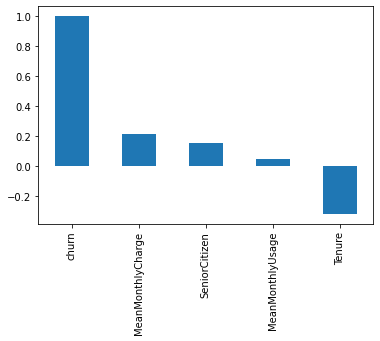

In [ ]:
df.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

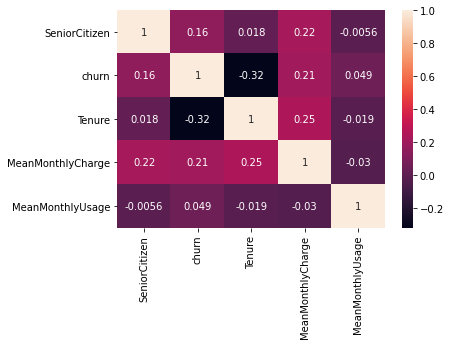

In [ ]:
import seaborn as sn
df_corr =df.corr()
df_corr
sn.heatmap(df_corr, annot=True)

In [ ]:
df['churn'].replace(to_replace="Yes", value = 1, inplace = True)
df['churn'].replace(to_replace="No", value = 0, inplace = True)

In [ ]:
df_Dummies = pd.get_dummies(df)
df_Dummies.head()

NameError: ignored

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = df_Dummies.drop(['churn','MeanMonthlyUsage'], axis =1 )
y = df_Dummies.churn
vif_df["VIF"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data2["features"] = x.columns


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


NameError: ignored